### University Admission with Logistic Regression Implementation
Suppose that you are the administrator of a university department and
you want to determine each applicant's chance of admission based on their
results on two exams. You have historical data from previous applicants
that you can use as a training set for logistic regression. For each training
example, you have the applicant's scores on two exams and the admissions
decision.

<img src="./images/university-admission.jpg" alt="Image for illustration purpose only" width="300" />


Your task is to build a classification model that estimates an applicant's
probability of admission based the scores from those two exams.

In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
from scipy.optimize import minimize

#### Data Visualisation

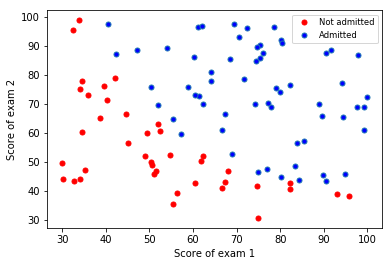

In [135]:
with open('data/exam_scores.txt', 'r') as f:
    data = f.readlines()
data = [list(map(float, i.split(','))) for i in data]
data = np.array(data)
X = data[:,:-1]; y = data[:,-1]
m,n = X.shape[0], X.shape[1]     # number of training examples
fig, ax = plt.subplots()
#np.argwhere(y=0)
s0 =[i for i in range(m) if y[i] ==0]
s1 =[i for i in range(m) if y[i] ==1]
ax.plot(X[:,0][s0],X[:,1][s0], 'ro', markersize=5, markerfacecolor='red', label='Not admitted')
ax.plot(X[:,0][s1],X[:,1][s1], 'o', markersize=5, markerfacecolor='blue', label='Admitted')
y = y.reshape(m,1)
plt.ylabel('Score of exam 2')
plt.xlabel('Score of exam 1')
legend = ax.legend(loc='upper right', shadow=False, fontsize='small')
tmp = X

#### Model Construction and Cost minimization

In [246]:
X = np.append(np.ones((m,1)),tmp, axis=1)
initial_theta = np.zeros((n+1, 1))

def sigmoid(z):
    g = np.zeros(z.shape)
    g = 1.0/(1+np.exp(-z))
    return g

def costFunction(theta, X,y):
    m = y.shape[0]
    J = 0.0
    h =  (sigmoid(X.dot(theta)))
    J = 1./m*( -np.transpose(np.log(h)).dot(y)  -  np.transpose(np.log(1-h)).dot(1-y) ) 
    return J

def gradient(theta, X, y):
    # Computes the gradient of the cost function at the point theta, can be used in 
    h =  sigmoid(X.dot(theta))
    return 1/m*X.T.dot(h-y)

# using 'Nelder-Mead' method and the module minimize from scipy.optimize to optimize parameters.    
xopt = minimize(costFunction, x0=initial_theta, args = (X,y), method='Nelder-Mead', options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


#### Plot Decision Boundary

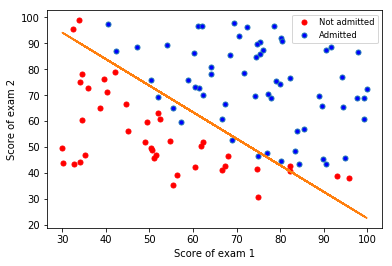

In [247]:
theta = xopt.x
ax.plot(X[:,1],-(theta[0]+theta[1]*X[:,1])/theta[2], '-')
fig

#### Prediction & Accuracies

In [260]:
prob = sigmoid(np.array([1,45,85]).dot(theta.T))
print('For a student with scores 45 and 85, we predict an admission probability of:\n %f' % prob)

For a student with scores 45 and 85, we predict an admission probability of:
 0.776292


In [270]:
def predict(theta, X):
    m = X.shape[0]
    p = np.zeros((X.shape[0],1))
    h = sigmoid(X.dot(theta))
    p = [0 if i<0.5 else 1 for i in h ]
    return p
p = predict(theta, X)
accu = sum([1 for i in range(m) if abs(p[i]-y[i]) < 0.001 ])/m * 100
print('Train Accuracy: %.2f\n'% accu);

Train Accuracy: 89.00

